In [2]:
% matplotlib inline


    model one()
        J0: S1 -> S2; k1*S1;
        S1=10.0; S2=0.0; k1=0.1;
    end

    model three()
        A: one();
        A.k1 is k1;
        k1 := time+0.1;
    end



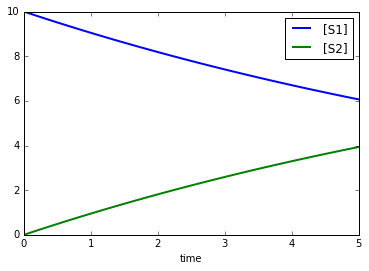

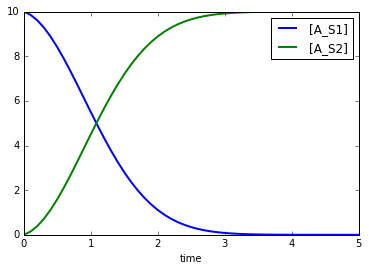

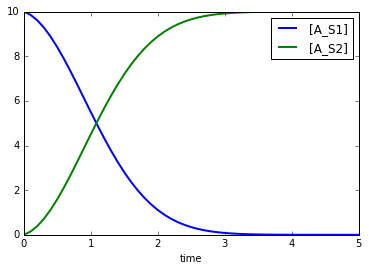

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [26]:
from __future__ import print_function, division
import tellurium as te

# Defining the model as one antimony is working
antOne = """
    model one()
        J0: S1 -> S2; k1*S1;
        S1=10.0; S2=0.0; k1=0.1;
    end
"""

antTwo = """
    model one()
        J0: S1 -> S2; k1*S1;
        S1=10.0; S2=0.0; k1=0.1;
    end

    model two()
        A: one();
        A.k1 is k1;
        k1 := time+0.1;
    end
"""
rOne = te.loada(antOne)
rTwo = te.loada(antTwo)

# Referencing another model not in the string 
# is not working
# this is crucial to modify other sbml models
antThreeMods = """
    model three()
        A: one();
        A.k1 is k1;
        k1 := time+0.1;
    end
"""
antThree = antOne + antThreeMods
print(antThree)
rThree = te.loada(antThree)
sOne = rOne.simulate()
rOne.plot(sOne)
sTwo = rTwo.simulate()
rTwo.plot(sTwo)
sThree = rThree.simulate()
rThree.plot(sThree)

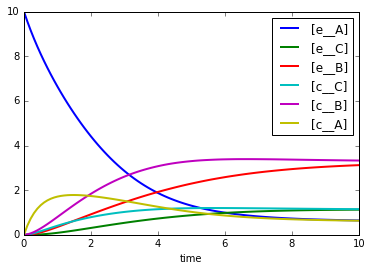

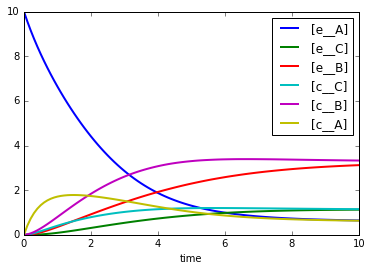

*** Modified Antimony model ***
// Created by libAntimony v2.9.0
model *Koenig_demo_10()

  // Compartments and Species:
  compartment e, c;
  species e__A in e, e__C in e, e__B in e, c__C in c, c__B in c, c__A in c;

  // Reactions:
  bA: e__A => c__A; scale_f*(Vmax_bA/Km_A)*(e__A - c__A)/(1 dimensionless + e__A/Km_A + c__A/Km_A);
  bB: c__B => e__B; scale_f*(Vmax_bB/Km_B)*(c__B - e__B)/(1 dimensionless + e__B/Km_B + c__B/Km_B);
  bC: c__C => e__C; scale_f*(Vmax_bC/Km_C)*(c__C - e__C)/(1 dimensionless + e__C/Km_C + c__C/Km_C);
  v1 in c: c__A => c__B; (scale_f*Vmax_v1/Km_A)*(c__A - (1 dimensionless/Keq_v1)*c__B);
  v2 in c: c__A => c__C; (scale_f*Vmax_v2/Km_A)*c__A;
  v3 in c: c__C => c__A; (scale_f*Vmax_v3/Km_A)*c__C;
  v4 in c: c__C => c__B; (scale_f*Vmax_v4/Km_A)*(c__C - (1 dimensionless/Keq_v4)*c__B);

  // Species initializations:
  e__A = 10;
  e__A has mM;
  e__C = 0;
  e__C has mM;
  e__B = 0;
  e__B has mM;
  c__C = 0;
  c__C has mM;
  c__B = 0;
  c__B has mM;
  c__A = 0;
  c

In [32]:
from __future__ import print_function, division
import tellurium as te

# Load an SBML model
r = te.loads("Koenig_demo_10.xml")
antDemo = r.getAntimony()

# Simulate unmodified model
sr = r.simulate(0, 10, 101)
r.plot(sr)

# Change Km_A value over time (original model is required as part of antimony string)
antMod1 = """
model Mod1()
    A: Koenig_demo_10();
    A.Km_A is Km_A;
    Km_A := 1.1+sin(time);
end
"""

# Simulate the modified model
antDemoMod1 = antDemo + antMod1
rMod1 = te.loada(antDemoMod1)
sMod1 = rMod1.simulate(0, 10, 101)
rMod1.plot(sMod1)

print('*** Modified Antimony model ***')
print(antDemoMod1)
print('*** Modified SBML model ***')
print(rMod1.getSBML())